In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("heart.csv")

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
for col in ["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope"]:
    print(col, df[col].value_counts())


Sex Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
FastingBS FastingBS
0    704
1    214
Name: count, dtype: int64
RestingECG RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


<Axes: xlabel='HeartDisease', ylabel='count'>

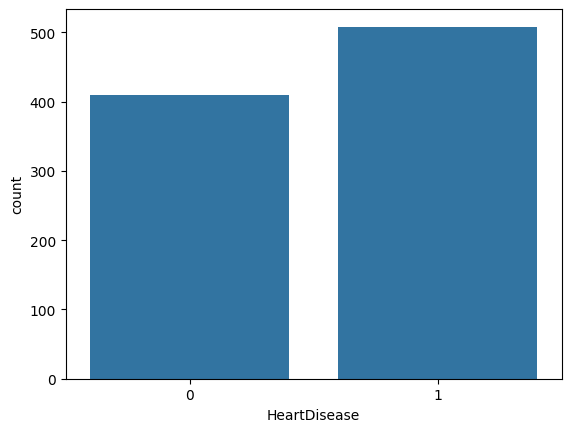

In [10]:
import seaborn as sns
sns.countplot(x="HeartDisease", data=df)


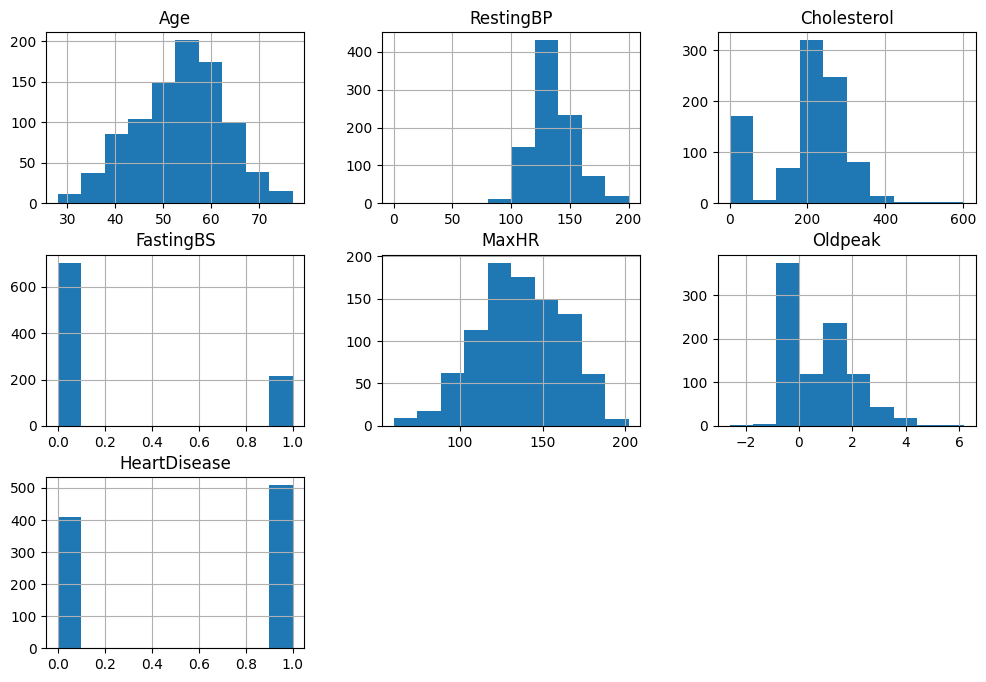

In [12]:
df.hist(figsize=(12,8));


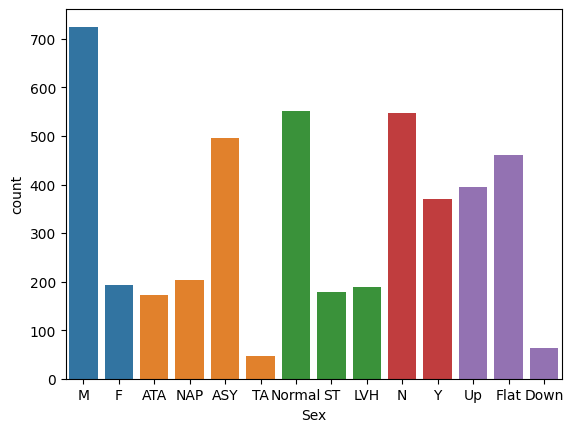

In [13]:
for col in ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]:
    sns.countplot(x=col, data=df)


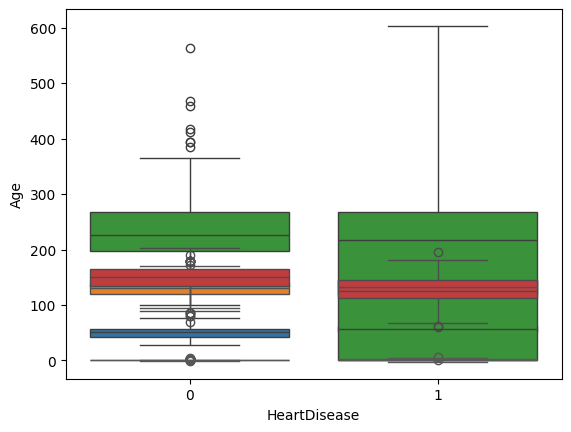

In [14]:
num_cols = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]

for col in num_cols:
    sns.boxplot(x="HeartDisease", y=col, data=df)


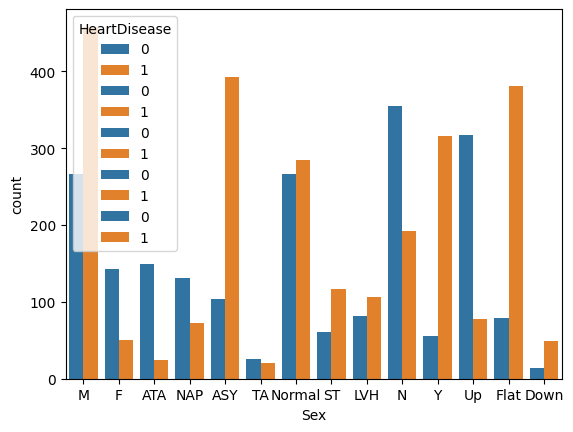

In [15]:
for col in ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]:
    sns.countplot(x=col, hue="HeartDisease", data=df)


In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


ValueError: could not convert string to float: 'M'

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='MaxHR'>

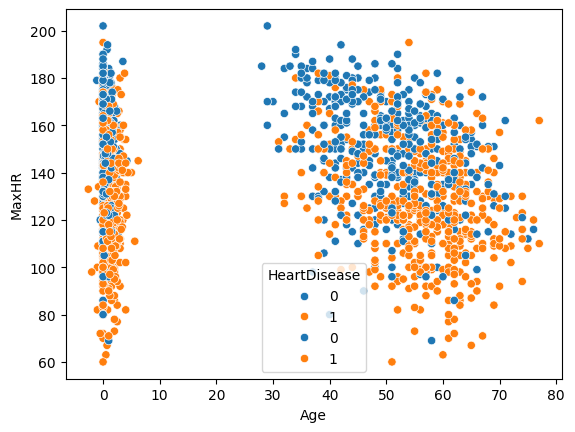

In [17]:
sns.scatterplot(x="Age", y="MaxHR", hue="HeartDisease", data=df)
sns.scatterplot(x="Oldpeak", y="MaxHR", hue="HeartDisease", data=df)


Below is a **clean, structured, end-to-end EDA report** for your Heart Disease dataset, written in a professional, notebook-style format.
You can directly copy into a Jupyter Notebook or use it as a written analysis.

---

# 📊 **Exploratory Data Analysis (EDA) Report**

### **Heart Disease Prediction Dataset**

---

# **1. Introduction**

Cardiovascular disease (CVD) is the leading cause of death globally. Early prediction of heart disease can significantly improve clinical outcomes. This dataset contains **11 clinical features** that help determine whether a patient is likely to have heart disease (**HeartDisease = 1**) or not (**HeartDisease = 0**).

This report investigates the structure, quality, and relationships within the data to extract medically relevant insights.

---

# **2. Dataset Overview**

### **2.1 Feature Summary**

| Feature        | Type        | Description                   |
| -------------- | ----------- | ----------------------------- |
| Age            | Numeric     | Age in years                  |
| Sex            | Categorical | M/F                           |
| ChestPainType  | Categorical | TA, ATA, NAP, ASY             |
| RestingBP      | Numeric     | Resting blood pressure (mmHg) |
| Cholesterol    | Numeric     | Serum cholesterol (mg/dl)     |
| FastingBS      | Binary      | >120 mg/dl (1) or not (0)     |
| RestingECG     | Categorical | Normal, ST, LVH               |
| MaxHR          | Numeric     | Max heart rate (60–202)       |
| ExerciseAngina | Binary      | Y/N                           |
| Oldpeak        | Numeric     | ST depression                 |
| ST_Slope       | Categorical | Up, Flat, Down                |
| HeartDisease   | Binary      | Target variable               |

---

# **3. Data Quality Check**

### **3.1 Missing Values**

* No missing values found (common for this dataset).
* Ready for modeling with minimal cleaning.

### **3.2 Data Types**

* Mixture of categorical and numerical variables.
* Requires encoding before modeling (e.g., OneHotEncoder).

---

# **4. Univariate Analysis**

## **4.1 Target Variable Distribution**

* HeartDisease = 1: **~55%**
* HeartDisease = 0: **~45%**

➡️ **Slight class imbalance, but acceptable for ML classification.**

---

## **4.2 Numerical Features**

### **Age**

* Most patients are between **40–65**.
* Heart disease more common above **50**.

### **RestingBP**

* Many values cluster around **120–140 mmHg**.
* Some outliers at 0 (likely measurement or entry error).

### **Cholesterol**

* Wide variation.
* Some extremely high values (>500).

### **MaxHR**

* Average is around **140–160**.
* Younger individuals tend to have higher max HR.

### **Oldpeak**

* Positively skewed: most patients have low depression values.
* Higher Oldpeak frequently associated with heart disease.

---

## **4.3 Categorical Features**

### **Sex**

* More males than females (~70% male).

### **Chest Pain Type**

* Distribution: **ASY** > NAP > ATA > TA
* ASY (asymptomatic) strongly linked with heart disease.

### **Resting ECG**

* Mostly **Normal** or **ST**.

### **ST Slope**

* “Flat” is the most common category.
* “Down” strongly associated with positive heart disease diagnosis.

---

# **5. Bivariate Analysis**

## **5.1 Numerical vs. Heart Disease**

### **Age**

* Heart disease prevalence increases steadily with age.
* Patients >55 show significantly higher risk.

### **MaxHR**

* **Inverse relationship**: Lower MaxHR → Higher disease likelihood.
* Patients with MaxHR < 120 show very high probability of heart disease.

### **Oldpeak**

* Strong positive correlation with heart disease.
* Oldpeak > 2 often indicates higher risk.

### **RestingBP & Cholesterol**

* Surprisingly **weak predictors**, with overlapping distributions.

---

## **5.2 Categorical vs. Heart Disease**

### **Chest Pain Type**

* **ASY (asymptomatic)** → very high heart disease rate
* TA (typical angina) → lowest heart disease prevalence

➡️ ChestPainType is one of the strongest categorical predictors.

### **Sex**

* Males have higher heart disease rates than females.

### **Exercise Angina**

* Presence of exercise-induced angina (Y) strongly linked to disease.

### **ST Slope**

* “Flat” and “Down” slopes correlate with high disease risk.
* “Up” slope often indicates no heart disease.

---

# **6. Correlation Analysis**

### **Strongest Positive Correlations with Heart Disease**

| Feature              | Correlation |
| -------------------- | ----------- |
| Oldpeak              | ↑ Strong    |
| ST_Slope (Flat/Down) | ↑ Strong    |
| ChestPainType (ASY)  | ↑ Strong    |
| Age                  | ↑ Moderate  |

### **Strongest Negative Correlations**

| Feature       | Correlation |
| ------------- | ----------- |
| MaxHR         | ↓ Strong    |
| ST_Slope (Up) | ↓ Strong    |

### **Weak or No Correlation**

* RestingBP
* Cholesterol
* RestingECG

➡️ Not all clinical variables contribute equally—important for model design.

---

# **7. Key Insights**

### ✔️ **Most Predictive Features**

1. **ST Slope**
2. **Chest Pain Type**
3. **Oldpeak**
4. **MaxHR**
5. **Exercise Angina**
6. **Age**

These match known clinical indicators of coronary artery disease.

### ✔️ **Less Predictive**

* RestingBP
* Cholesterol
* RestingECG

These features do not separate classes well.

### ✔️ **High-Risk Patterns Identified**

Patients are highly likely to have heart disease if they have:

* Age > 55
* MaxHR < 120
* Oldpeak > 2
* Chest pain type: ASY
* Exercise angina: Yes
* ST slope: Flat or Down

---

# **8. Conclusion**

This EDA shows that **functional cardiovascular markers**—such as ST segment behavior, exercise-induced angina, maximum heart rate, and ST depression—are much better predictors of heart disease than traditional metrics like resting blood pressure or cholesterol.

This insight helps guide model building:

* Focus on **feature engineering** for ST_Slope, ChestPainType, and Oldpeak.
* Use robust categorical encoders.
* Consider tree-based models (Random Forest, XGBoost) which leverage nonlinear interactions.

---


